In [1]:
################################################################################
# CS 156a Bonus Exercise
# Author: Aadyot Bhatnagar
# Last modified: October 27, 2018
# Description: A script to train and save a neural net to recognize the MNIST
#              dataset of handwritten digits. Supports both a standard dense
#              network and a convolutional network.
################################################################################

import os
import argparse
import simplejson
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.regularizers import l2, l1
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [3]:
## Parse command line arguments
def args():
    parser = argparse.ArgumentParser()
    parser.add_argument('-m', '--model-name',
        help='prefix for file to save trained model to ' +
            '(e.g. dense_arch1, conv_regularize05, etc.)',
        required=True)
    parser.add_argument('-r', '--regularizer-strength',
        help='strength of l2 regularization to use',
        type=float, default=0.00)

    net_type = parser.add_mutually_exclusive_group()
    net_type.add_argument('-d', '--dense',
        help='build dense neural net (default)',
        action='store_true',
        default=True)
    net_type.add_argument('-c', '--conv', 
        help='build convolutional neural net',
        action='store_true',
        default=False)

    return parser.parse_args()

In [2]:
## Return MNIST dataset, shaped appropriately depending on whether we are
## want to train a dense or convolutional neural net
def get_data(is_net_conv):
    # Import the MNIST dataset using Keras
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalize input images to have all values in [0, 1]
    # Reshape image dataset to have shape (N, H, W, C) instead of (N, H, W)
    if is_net_conv:
        X_train = X_train.reshape((*(X_train.shape), 1)) / 255
        X_test = X_test.reshape((*(X_test.shape), 1)) / 255

    # Normalize input images to have all values in [0, 1]
    # Flatten image dataset to have shape (N, H * W) instead of (N, H, W)
    else:
        X_train = X_train.reshape((X_train.shape[0], -1)) / 255
        X_test = X_test.reshape((X_test.shape[0], -1)) / 255

    # Convert labels to one-hot vectors (probability distributions w/
    # probability 1 assigned to the correct label)
    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)

    return (X_train, y_train), (X_test, y_test)

In [3]:
# ## Construct a dense neural net and return it
# def build_dense_net(reg_param, first_layer_neurons, second_layer_neurons):
#     model = Sequential()
#     model.add(Dense(first_layer_neurons, input_shape=(784,), kernel_regularizer=l2(reg_param)))
#     model.add(Activation('relu'))
#     model.add(Dense(second_layer_neurons, kernel_regularizer=l2(reg_param)))
#     model.add(Activation('relu'))
#     model.add(Dense(10, kernel_regularizer=l2(reg_param)))
#     model.add(Activation('softmax'))
#     return model




## Construct a convolutional neural net and return it
def build_conv_net(reg_param):
    model = Sequential()
    model.add(Conv2D(20, (5, 5), padding='same',
                     input_shape=(28, 28, 1),
                     kernel_regularizer=l2(reg_param)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(10, (3, 3), padding='same',
        kernel_regularizer=l2(reg_param)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Need to flatten tensor output from conv layer to vector for dense layer
    model.add(Flatten())
    model.add(Dense(10, kernel_regularizer=l2(reg_param)))
    model.add(Activation('softmax'))

    return model



## Construct a dense neural net and return it
def build_dense_net(reg_param, neuron_count_layers, reg_type):
    model = Sequential()
    if reg_type == 'l2':
        model.add(Dense(
            neuron_count_layers[0], input_shape=(784,), kernel_regularizer=l2(reg_param)
            ))
    else:
        model.add(Dense(
            neuron_count_layers[0], input_shape=(784,), kernel_regularizer=l1(reg_param)
            ))
    model.add(Activation('relu'))
    
    try:
        for neuron_count in neuron_count_layers[1:]:
            if reg_type == 'l2':
                model.add(Dense(neuron_count, kernel_regularizer=l2(reg_param)))
            else:
                model.add(Dense(neuron_count, kernel_regularizer=l1(reg_param)))
            model.add(Activation('relu'))
    except:
        pass
        
    model.add(Dense(10, kernel_regularizer=l2(reg_param)))
    model.add(Activation('relu'))
    return model

In [40]:
a = [4, 6, 7, 8]
b = [str(num) for num in a]
'-'.join(b)

'4-6-7-8'

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_15 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_16 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_17 (Activation)   (None, 10)                0         
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
__________________________________________________

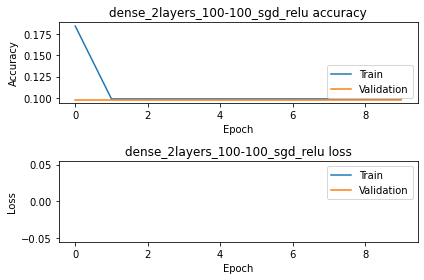

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_18 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_19 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_20 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

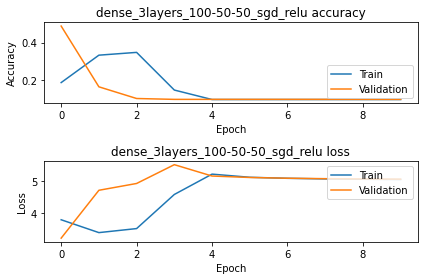

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 150)               117750    
_________________________________________________________________
activation_22 (Activation)   (None, 150)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 50)                7550      
_________________________________________________________________
activation_23 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                510       
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 125,810
Trainable params: 125,810
Non-trainable params: 0
________________________________________________

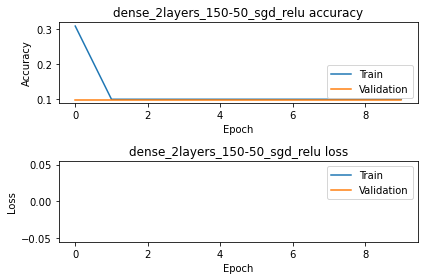

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 200)               157000    
_________________________________________________________________
activation_25 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2010      
_________________________________________________________________
activation_26 (Activation)   (None, 10)                0         
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 5.2206 - accuracy: 0.1602 - val_loss: 5.4769 - val_accuracy: 0.0974
Epoch 2/10
469/469 [==============================] - 0s 1ms/step - loss: 5.3435 - accuracy: 0.0975 - va

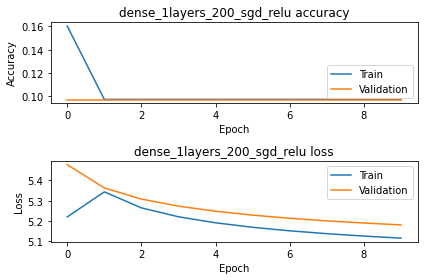

In [8]:
import numpy as np
def main(reg_param, neuron_count_layers, reg_type):
    neuron_count_layers_str = [str(neuron_count) for neuron_count in neuron_count_layers]
    model = '-'.join(neuron_count_layers_str)
    model_name = f'dense_{len(neuron_count_layers)}layers_{model}_sgd_relu'

    # Remove src from cwd if necessary
    cwd = os.getcwd()
    if os.path.basename(cwd) == 'src': cwd = os.path.dirname(cwd)

    # Create img directory to save images if needed
    os.makedirs(os.path.join(cwd, 'img'), exist_ok=True)
    plot_fname = os.path.join(cwd, 'img', '%s_learn.png' % model_name)

    # Create model directory to save models if needed
    os.makedirs(os.path.join(cwd, 'model'), exist_ok=True)
    model_weights_fname = os.path.join(cwd, 'model', model_name + '.h5')
    model_json_fname = os.path.join(cwd, 'model', model_name + '.json')


    is_net_conv = False
    regularizer_strength = reg_param

    # Importing the MNIST dataset using Keras
    (X_train, y_train), (X_test, y_test) = get_data(is_net_conv)

    if is_net_conv:
        model = build_conv_net(regularizer_strength)
    else:
        model = build_dense_net(reg_param, neuron_count_layers, reg_type)

    # Print a summary of the layers and weights in the model
    model.summary()

    # Have our model minimize the categorical cross entropy loss with the adam
    # optimizer (fancier stochastic gradient descent that converges faster)
    model.compile(loss='categorical_crossentropy', optimizer='sgd',
        metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, 
        validation_data=(X_test, y_test))

    # Save model weights and json spec describing the model's architecture
    model.save(model_weights_fname)
    model_json = model.to_json()
    with open(model_json_fname, 'w') as f:
        f.write(simplejson.dumps(simplejson.loads(model_json), indent=4))

    # Plot accuracy learning curve
    ax1 = plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('%s accuracy' % model_name)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.savefig(plot_fname)

    # Plot loss learning curve
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('%s loss' % model_name)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.savefig(plot_fname)
    plt.show()

    return np.max(history.history['val_accuracy'])

architectures = [
    [100, 100], [100, 50, 50], [150, 50], [200]
]
acc_list = []
for architecture in architectures:
    acc = main(0.00001, architecture, 'l2')
    acc_list.append(acc)

In [9]:
acc_list

[0.09799999743700027,
 0.4876999855041504,
 0.09799999743700027,
 0.09740000218153]